In [354]:
from bs4 import BeautifulSoup
import requests

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import levene
from statsmodels.sandbox.stats.multicomp import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import string
import time

In [106]:
alphabet = string.ascii_lowercase

fighter_details = {}

for letter in alphabet:

    response = requests.get(f"http://www.ufcstats.com/statistics/fighters?char={letter}&page=all")
    
    soup = BeautifulSoup(response.text, "lxml")
    
    fighter_details[letter] = soup.find_all("td",{'class':'b-statistics__table-col'})
    

In [107]:
fighter_details

{'a': [<td class="b-statistics__table-col">
  <a class="b-link b-link_style_black" href="http://www.ufcstats.com/fighter-details/93fe7332d16c6ad9">Tom</a>
  </td>, <td class="b-statistics__table-col">
  <a class="b-link b-link_style_black" href="http://www.ufcstats.com/fighter-details/93fe7332d16c6ad9">Aaron</a>
  </td>, <td class="b-statistics__table-col">
  <a class="b-link b-link_style_black" href="http://www.ufcstats.com/fighter-details/93fe7332d16c6ad9"></a>
  </td>, <td class="b-statistics__table-col">
            --
          </td>, <td class="b-statistics__table-col">
            155 lbs.
          </td>, <td class="b-statistics__table-col">
            --
          </td>, <td class="b-statistics__table-col">
  </td>, <td class="b-statistics__table-col b-statistics__table-col_type_small">
            5
          </td>, <td class="b-statistics__table-col b-statistics__table-col_type_small">
            3
          </td>, <td class="b-statistics__table-col b-statistics__table-col

In [108]:
# fighter_first_names = []

# for fighter in np.arange(0, len(fighter_details["a"]), 11):
#         fighter_first_name = fighter_details["a"][fighter].text.split("\n")[1]
#         fighter_first_names.append(fighter_first_name)

In [630]:
fighter_first_names = []

for key, value in fighter_details.items():
    for fighter in np.arange(0, len(fighter_details[key]), 11):
        fighter_first_name = value[fighter].text.split("\n")[1]
        fighter_first_names.append(fighter_first_name)

In [631]:
len(fighter_first_names)

3405

In [632]:
fighter_first_names

['Tom',
 'Danny',
 'David',
 'Shamil',
 'Hiroyuki',
 'Daichi',
 'Papy',
 'Ricardo',
 'Klidson',
 'Daniel',
 'Scott',
 'Juan',
 'Anthony',
 'Israel',
 'Sam',
 'Nick',
 'Mariya',
 'Marcelo',
 'Edwin',
 'Jessica',
 'Kevin',
 'Mike',
 'Hitomi',
 'Omari',
 'Yoshihiro',
 'Rostem',
 'Razak',
 'Mostapha',
 'Herdem',
 'Javi',
 'Heili',
 'Brett',
 'John',
 'Junior',
 'Wes',
 'Alexandra',
 'Israel',
 'Juan',
 'Iuri',
 'Ildemar',
 'Alfonso',
 'Gilbert',
 'Irene',
 'Hector',
 'Jose',
 'JJ',
 'Jim',
 'John',
 'Houston',
 'Kenneth',
 'Marcio',
 'Olaf',
 'Pablo',
 'Levi',
 'Bill',
 'Royce',
 'Amir',
 'Sultan',
 'John',
 'George',
 'Arnold',
 'Brendan',
 'Benny',
 'Ricardo',
 'Magno',
 'Thomas',
 'Ericka',
 'Estefani',
 'Mauricio',
 'Sarah',
 'Rico',
 'Mike',
 'Sean',
 'Eddie',
 'Jaime',
 'Joel',
 'Thiago',
 'Anthony',
 'Amilcar',
 'Warlley',
 'Sam',
 'Andre',
 'Adlan',
 'Maiara',
 'Chris',
 'Jimmy',
 'JJ',
 'Alen',
 'Makwan',
 'Bertrand',
 'Karl',
 'Eryk',
 'Matt',
 'Andy',
 'Lowell',
 'Corey',
 'Dere

In [633]:
fighter_last_names = []

for key, value in fighter_details.items():
    for fighter in np.arange(1, len(fighter_details[key]) + 1, 11):
        fighter_last_name = value[fighter].text.split("\n")[1]
        fighter_last_names.append(fighter_last_name)

In [634]:
len(fighter_last_names)

3405

In [635]:
fighter_last_names

['Aaron',
 'Abbadi',
 'Abbott',
 'Abdurakhimov',
 'Abe',
 'Abe',
 'Abedi',
 'Abreu',
 'Abreu',
 'Acacio',
 'Adams',
 'Adams',
 'Adams',
 'Adesanya',
 'Adkins',
 'Agallar',
 'Agapova',
 'Aguiar',
 'Aguilar',
 'Aguilar',
 'Aguilar',
 'Aina',
 'Akano',
 'Akhmedov',
 'Akiyama',
 'Akman',
 'Al-Hassan',
 'Al-Turk',
 'Alacabek',
 'Alanis',
 'Alateng',
 'Albee',
 'Albert',
 'Albini',
 'Albritton',
 'Albu',
 'Albuquerque',
 'Alcain',
 'Alcantara',
 'Alcantara',
 'Alcarez',
 'Aldana',
 'Aldana',
 'Aldana',
 'Aldo',
 'Aldrich',
 'Alers',
 'Alessio',
 'Alexander',
 'Alexander',
 'Alexandre Junior',
 'Alfonso',
 'Alfonso',
 'Alford',
 'Algeo',
 'Alger',
 'Aliakbari',
 'Aliev',
 'Allan',
 'Allen',
 'Allen',
 'Allen',
 'Alloway',
 'Almeida',
 'Almeida',
 'Almeida',
 'Almeida',
 'Almeida',
 'Alonso',
 'Alpar',
 'Altamirano',
 'Altman',
 'Alvarez',
 'Alvarez',
 'Alvarez',
 'Alvarez',
 'Alves',
 'Alves',
 'Alves',
 'Alves',
 'Alvey',
 'Amado',
 'Amagov',
 'Amanajas dos Santos',
 'Amarante',
 'Ambriz',
 

In [636]:
fighter_nick_names = []

for key, value in fighter_details.items():
    for fighter in np.arange(2, len(fighter_details[key]) + 2, 11):
        fighter_nick_name = value[fighter].text.split("\n")[1]
        fighter_nick_names.append(fighter_nick_name)

In [637]:
len(fighter_nick_names)

3405

In [638]:
fighter_nick_names

['',
 'The Assassin',
 'Tank',
 'Abrek',
 'Abe Ani',
 '',
 'Makambo',
 'Demente',
 'White Bear',
 '',
 '',
 'The Kraken',
 'Sugafoot',
 'The Last Stylebender',
 'The Experience',
 '',
 '',
 '',
 'Tigre',
 'Jag',
 'Angel of Death',
 'Iron',
 'Girlfight Monster',
 'Wolverine',
 '',
 'Kurdimus Prime',
 '',
 '',
 '',
 '',
 'The Mongolian Knight',
 '',
 'Prince',
 'Baby',
 '',
 'Stitch',
 '',
 '',
 'Marajo',
 'Marajo',
 '',
 'El Peligro',
 '',
 'El Charro',
 '',
 '',
 'The Beast',
 'The Natural',
 'The Assassin',
 'The Machine',
 'Lyoto',
 '',
 'The Hurricane',
 '',
 'Senor Perfecto',
 '',
 '',
 '',
 '',
 '',
 'Almighty',
 'All In',
 'Blanco',
 'Big Dog',
 '',
 'Thominhas',
 '',
 '',
 '',
 'Too Sweet',
 '',
 '',
 '',
 'The Underground King',
 '',
 'El Fenomeno',
 'Pitbull',
 '',
 '',
 '',
 "Smile'N",
 'Dida',
 'Borz',
 '',
 '',
 'The Titan',
 '',
 '',
 'Mr. Finland',
 '',
 'The Psycho',
 'Ya Boi',
 '',
 'The Hammer',
 '',
 'Overtime',
 'Barbaric',
 '',
 'El Toro',
 'Bate Estaca',
 '',
 '',


In [639]:
fighter_heights = []

for key, value in fighter_details.items():
    for fighter in np.arange(3, len(fighter_details[key]) + 3, 11):
        fighter_height = value[fighter].text.split("\n")[1][10:]
        fighter_heights.append(fighter_height)

In [640]:
len(fighter_heights)

3405

In [641]:
fighter_heights

['--',
 '5\' 11"',
 '6\' 0"',
 '6\' 3"',
 '5\' 6"',
 '5\' 11"',
 '5\' 11"',
 '5\' 11"',
 '6\' 0"',
 '5\' 8"',
 '6\' 0"',
 '6\' 5"',
 '6\' 0"',
 '6\' 4"',
 '6\' 3"',
 '5\' 8"',
 '5\' 8"',
 '5\' 10"',
 '5\' 10"',
 '5\' 3"',
 '5\' 7"',
 '5\' 9"',
 '5\' 4"',
 '6\' 0"',
 '5\' 10"',
 '5\' 10"',
 '6\' 2"',
 '6\' 2"',
 '6\' 2"',
 '5\' 6"',
 '5\' 5"',
 '--',
 '5\' 8"',
 '6\' 3"',
 '5\' 10"',
 '5\' 2"',
 '--',
 '--',
 '5\' 9"',
 '6\' 2"',
 '5\' 3"',
 '6\' 1"',
 '5\' 9"',
 '5\' 11"',
 '5\' 7"',
 '5\' 5"',
 '5\' 9"',
 '5\' 10"',
 '6\' 0"',
 '5\' 9"',
 '6\' 0"',
 '6\' 2"',
 '5\' 8"',
 '--',
 '6\' 0"',
 '5\' 10"',
 '6\' 3"',
 '5\' 11"',
 '6\' 3"',
 '6\' 2"',
 '5\' 8"',
 '6\' 2"',
 '5\' 11"',
 '6\' 0"',
 '6\' 0"',
 '5\' 7"',
 '5\' 6"',
 '5\' 4"',
 '6\' 2"',
 '5\' 4"',
 '5\' 10"',
 '5\' 10"',
 '6\' 0"',
 '5\' 9"',
 '5\' 8"',
 '6\' 3"',
 '5\' 9"',
 '--',
 '6\' 0"',
 '5\' 11"',
 '6\' 2"',
 '6\' 0"',
 '6\' 2"',
 '5\' 5"',
 '--',
 '6\' 2"',
 '5\' 10"',
 '5\' 10"',
 '5\' 10"',
 '5\' 8"',
 '5\' 11"',
 '6\' 

In [642]:
fighter_weights = []

for key, value in fighter_details.items():
    for fighter in np.arange(4, len(fighter_details[key]) + 4, 11):
        fighter_weight = value[fighter].text.split("\n")[1][10:13]
        fighter_weights.append(fighter_weight)

In [643]:
len(fighter_weights)

3405

In [644]:
fighter_weights

['155',
 '155',
 '265',
 '235',
 '145',
 '170',
 '185',
 '185',
 '205',
 '180',
 '225',
 '265',
 '185',
 '185',
 '225',
 '155',
 '125',
 '170',
 '185',
 '115',
 '145',
 '155',
 '135',
 '185',
 '170',
 '170',
 '205',
 '245',
 '205',
 '135',
 '135',
 '225',
 '135',
 '264',
 '188',
 '115',
 '185',
 '--',
 '135',
 '185',
 '145',
 '250',
 '135',
 '170',
 '135',
 '125',
 '145',
 '155',
 '205',
 '155',
 '185',
 '170',
 '145',
 '--',
 '145',
 '199',
 '250',
 '170',
 '205',
 '205',
 '145',
 '185',
 '170',
 '170',
 '155',
 '135',
 '115',
 '125',
 '170',
 '135',
 '170',
 '185',
 '235',
 '155',
 '125',
 '155',
 '170',
 '--',
 '170',
 '170',
 '205',
 '154',
 '170',
 '115',
 '185',
 '315',
 '170',
 '185',
 '145',
 '190',
 '185',
 '205',
 '230',
 '240',
 '160',
 '205',
 '155',
 '145',
 '200',
 '115',
 '170',
 '200',
 '185',
 '205',
 '205',
 '205',
 '205',
 '115',
 '205',
 '125',
 '205',
 '251',
 '170',
 '154',
 '255',
 '170',
 '145',
 '170',
 '135',
 '170',
 '125',
 '145',
 '145',
 '155',
 '240',
 '-

In [645]:
fighter_reaches = []

for key, value in fighter_details.items():
    for fighter in np.arange(5, len(fighter_details[key]) + 5, 11):
        fighter_reach = value[fighter].text.split("\n")[1][10:14]
        fighter_reaches.append(fighter_reach)

In [646]:
len(fighter_reaches)

3405

In [647]:
fighter_reaches

['--',
 '--',
 '--',
 '76.0',
 '--',
 '71.0',
 '74.0',
 '73.0',
 '74.0',
 '--',
 '--',
 '80.0',
 '77.0',
 '80.0',
 '--',
 '--',
 '--',
 '--',
 '--',
 '63.0',
 '73.0',
 '--',
 '--',
 '73.0',
 '73.0',
 '72.0',
 '--',
 '77.0',
 '75.0',
 '--',
 '66.0',
 '--',
 '68.0',
 '74.0',
 '--',
 '63.0',
 '--',
 '--',
 '71.0',
 '78.0',
 '--',
 '--',
 '68.0',
 '72.0',
 '70.0',
 '67.0',
 '71.0',
 '72.0',
 '72.0',
 '--',
 '75.0',
 '--',
 '--',
 '--',
 '73.0',
 '--',
 '--',
 '74.0',
 '75.0',
 '--',
 '70.0',
 '75.0',
 '75.0',
 '74.0',
 '--',
 '70.0',
 '68.0',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '69.0',
 '69.0',
 '77.0',
 '70.0',
 '--',
 '--',
 '72.0',
 '75.0',
 '--',
 '76.0',
 '--',
 '--',
 '--',
 '--',
 '74.0',
 '72.0',
 '--',
 '--',
 '75.0',
 '--',
 '--',
 '--',
 '79.0',
 '--',
 '72.0',
 '--',
 '62.0',
 '75.0',
 '--',
 '73.0',
 '--',
 '--',
 '--',
 '75.0',
 '64.0',
 '70.0',
 '63.0',
 '--',
 '77.0',
 '70.0',
 '--',
 '73.0',
 '--',
 '--',
 '--',
 '73.0',
 '77.0',
 '68.0',
 '70.0',
 '--',
 '--',
 '77

In [648]:
fighter_stances = []

for key, value in fighter_details.items():
    for fighter in np.arange(6, len(fighter_details[key]) + 6, 11):
        fighter_stance = value[fighter].text.split("\n")[1][10:]
        fighter_stances.append(fighter_stance)

In [649]:
len(fighter_stances)

3405

In [650]:
fighter_stances

['',
 'Orthodox',
 'Switch',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Southpaw',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Southpaw',
 'Orthodox',
 'Orthodox',
 'Switch',
 'Orthodox',
 'Orthodox',
 'Southpaw',
 'Orthodox',
 '',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Southpaw',
 'Orthodox',
 'Orthodox',
 'Switch',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 '',
 'Orthodox',
 '',
 '',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 '',
 'Southpaw',
 'Orthodox',
 '',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Southpaw',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Southpaw',
 'Orthodox',
 '',
 '',
 'Switch',
 'Orthodox',
 '',
 'Orthodox',
 'Orthodox',
 'Open Stance',
 'Southpaw',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 '',
 'Southpaw',
 '',
 'Orthodox',
 '',
 'Southpaw',
 '',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 'Orthodox',
 '',
 'Southpaw',
 'Orthodox',
 'Southpaw',
 'Orthodox',
 'Orthodox',
 'Southpaw',
 '',
 'Southpaw',
 'Orthodox',
 '

In [651]:
fighter_wins = []

for key, value in fighter_details.items():
    for fighter in np.arange(7, len(fighter_details[key]) + 7, 11):
        fighter_win = value[fighter].text.split("\n")[1][10:]
        fighter_wins.append(fighter_win)

In [652]:
len(fighter_wins)

3405

In [653]:
fighter_wins

['5',
 '4',
 '10',
 '20',
 '8',
 '6',
 '9',
 '5',
 '15',
 '26',
 '8',
 '5',
 '7',
 '18',
 '7',
 '24',
 '6',
 '2',
 '22',
 '20',
 '17',
 '12',
 '18',
 '20',
 '14',
 '6',
 '11',
 '6',
 '5',
 '0',
 '14',
 '3',
 '7',
 '14',
 '0',
 '7',
 '0',
 '1',
 '35',
 '21',
 '1',
 '6',
 '12',
 '4',
 '28',
 '8',
 '13',
 '34',
 '13',
 '5',
 '17',
 '8',
 '6',
 '1',
 '12',
 '3',
 '10',
 '15',
 '13',
 '13',
 '16',
 '13',
 '13',
 '13',
 '9',
 '22',
 '7',
 '7',
 '13',
 '8',
 '3',
 '1',
 '4',
 '29',
 '6',
 '16',
 '28',
 '1',
 '11',
 '14',
 '33',
 '6',
 '13',
 '7',
 '2',
 '15',
 '17',
 '8',
 '15',
 '1',
 '12',
 '13',
 '14',
 '0',
 '0',
 '14',
 '14',
 '10',
 '10',
 '20',
 '19',
 '14',
 '18',
 '7',
 '6',
 '0',
 '12',
 '10',
 '20',
 '12',
 '1',
 '14',
 '10',
 '30',
 '15',
 '10',
 '15',
 '7',
 '18',
 '25',
 '8',
 '16',
 '15',
 '4',
 '28',
 '5',
 '16',
 '14',
 '7',
 '23',
 '3',
 '9',
 '1',
 '3',
 '7',
 '14',
 '11',
 '9',
 '14',
 '19',
 '7',
 '8',
 '13',
 '27',
 '17',
 '10',
 '12',
 '9',
 '21',
 '2',
 '7',
 '16',
 '6

In [654]:
fighter_losses = []

for key, value in fighter_details.items():
    for fighter in np.arange(8, len(fighter_details[key]) + 8, 11):
        fighter_loss = value[fighter].text.split("\n")[1][10:]
        fighter_losses.append(fighter_loss)

In [655]:
len(fighter_losses)

3405

In [656]:
fighter_losses

['3',
 '6',
 '14',
 '5',
 '14',
 '2',
 '3',
 '3',
 '4',
 '12',
 '1',
 '3',
 '1',
 '0',
 '20',
 '6',
 '1',
 '3',
 '16',
 '8',
 '2',
 '6',
 '8',
 '4',
 '6',
 '2',
 '5',
 '6',
 '1',
 '3',
 '7',
 '1',
 '5',
 '6',
 '1',
 '2',
 '3',
 '2',
 '10',
 '8',
 '3',
 '2',
 '5',
 '4',
 '6',
 '4',
 '3',
 '16',
 '8',
 '5',
 '4',
 '11',
 '5',
 '4',
 '3',
 '2',
 '1',
 '3',
 '5',
 '19',
 '1',
 '3',
 '6',
 '5',
 '3',
 '3',
 '2',
 '2',
 '7',
 '4',
 '2',
 '4',
 '3',
 '6',
 '1',
 '2',
 '15',
 '3',
 '4',
 '4',
 '13',
 '4',
 '2',
 '3',
 '0',
 '18',
 '3',
 '2',
 '4',
 '1',
 '4',
 '4',
 '8',
 '1',
 '1',
 '5',
 '3',
 '4',
 '5',
 '7',
 '7',
 '4',
 '8',
 '3',
 '1',
 '5',
 '1',
 '6',
 '6',
 '3',
 '3',
 '5',
 '3',
 '5',
 '6',
 '3',
 '15',
 '1',
 '10',
 '8',
 '2',
 '4',
 '7',
 '1',
 '19',
 '2',
 '6',
 '5',
 '3',
 '10',
 '3',
 '3',
 '1',
 '1',
 '4',
 '4',
 '0',
 '4',
 '4',
 '2',
 '2',
 '3',
 '4',
 '7',
 '1',
 '5',
 '5',
 '2',
 '10',
 '1',
 '6',
 '10',
 '1',
 '4',
 '1',
 '5',
 '5',
 '5',
 '1',
 '0',
 '10',
 '9',
 '0',
 '2

In [657]:
fighter_draws = []

for key, value in fighter_details.items():
    for fighter in np.arange(9, len(fighter_details[key]) + 9, 11):
        fighter_draw = value[fighter].text.split("\n")[1][10:]
        fighter_draws.append(fighter_draw)

In [658]:
len(fighter_draws)

3405

In [659]:
fighter_draws

['0',
 '0',
 '0',
 '0',
 '3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0'

In [660]:
fighter_df = pd.DataFrame(fighter_last_names)
fighter_df.rename(columns={0:"last_name"}, inplace = True)

fighter_df["first_name"] = fighter_first_names
fighter_df["nick_name"] = fighter_nick_names
fighter_df["height"] = fighter_heights
fighter_df["weight"] = fighter_weights
fighter_df["reach"] = fighter_reaches
fighter_df["stance"] = fighter_stances
fighter_df["wins"] = fighter_wins
fighter_df["losses"] = fighter_losses
fighter_df["draws"] = fighter_draws

In [661]:
fighter_df.head()

,last_name,first_name,nick_name,height,weight,reach,stance,wins,losses,draws
0,Aaron,Tom,,--,155,--,,5,3,0
1,Abbadi,Danny,The Assassin,"5' 11""",155,--,Orthodox,4,6,0
2,Abbott,David,Tank,"6' 0""",265,--,Switch,10,14,0
3,Abdurakhimov,Shamil,Abrek,"6' 3""",235,76.0,Orthodox,20,5,0
4,Abe,Hiroyuki,Abe Ani,"5' 6""",145,--,Orthodox,8,14,3


In [662]:
fighter_df.size

34050

In [663]:
fighter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   last_name   3405 non-null   object
 1   first_name  3405 non-null   object
 2   nick_name   3405 non-null   object
 3   height      3405 non-null   object
 4   weight      3405 non-null   object
 5   reach       3405 non-null   object
 6   stance      3405 non-null   object
 7   wins        3405 non-null   object
 8   losses      3405 non-null   object
 9   draws       3405 non-null   object
dtypes: object(10)
memory usage: 266.1+ KB


In [664]:
fighter_df["wins"] = fighter_df["wins"].astype(int)
fighter_df["losses"] = fighter_df["losses"].astype(int)
fighter_df["draws"] = fighter_df["draws"].astype(int)

In [665]:
fighter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   last_name   3405 non-null   object
 1   first_name  3405 non-null   object
 2   nick_name   3405 non-null   object
 3   height      3405 non-null   object
 4   weight      3405 non-null   object
 5   reach       3405 non-null   object
 6   stance      3405 non-null   object
 7   wins        3405 non-null   int64 
 8   losses      3405 non-null   int64 
 9   draws       3405 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 266.1+ KB


In [666]:
fighter_df["total_fights"] = fighter_df.wins + fighter_df.losses + fighter_df.draws
fighter_df["win_ratio"] = round(fighter_df.wins/fighter_df.total_fights, 2)

In [667]:
fighter_df.head()

,last_name,first_name,nick_name,height,weight,reach,stance,wins,losses,draws,total_fights,win_ratio
0,Aaron,Tom,,--,155,--,,5,3,0,8,0.62
1,Abbadi,Danny,The Assassin,"5' 11""",155,--,Orthodox,4,6,0,10,0.40
2,Abbott,David,Tank,"6' 0""",265,--,Switch,10,14,0,24,0.42
3,Abdurakhimov,Shamil,Abrek,"6' 3""",235,76.0,Orthodox,20,5,0,25,0.80
4,Abe,Hiroyuki,Abe Ani,"5' 6""",145,--,Orthodox,8,14,3,25,0.32


In [668]:
initial_number_of_fighters = len(fighter_df)
initial_number_of_fighters

3405

In [669]:
fighter_df = fighter_df[fighter_df["stance"] != ""]

In [670]:
number_of_fighters_removed = initial_number_of_fighters - len(fighter_df)
number_of_fighters_removed

837

In [671]:
fighter_df["win_ratio"].mean()

0.6770911214953271

In [672]:
fighter_df["total_fights"].mean()

18.860981308411215

In [673]:
fighter_df = fighter_df[fighter_df["total_fights"] >= 10]

In [674]:
len(fighter_df)

2025

In [675]:
fighter_df.isnull().sum()

last_name       0
first_name      0
nick_name       0
height          0
weight          0
reach           0
stance          0
wins            0
losses          0
draws           0
total_fights    0
win_ratio       0
dtype: int64

In [676]:
fighter_df["stance"].unique()

array(['Orthodox', 'Switch', 'Southpaw', 'Open Stance'], dtype=object)

In [677]:
orthodox_df = fighter_df[fighter_df["stance"] == "Orthodox"]
orthodox_df.head()

,last_name,first_name,nick_name,height,weight,reach,stance,wins,losses,draws,total_fights,win_ratio
1,Abbadi,Danny,The Assassin,"5' 11""",155,--,Orthodox,4,6,0,10,0.40
3,Abdurakhimov,Shamil,Abrek,"6' 3""",235,76.0,Orthodox,20,5,0,25,0.80
4,Abe,Hiroyuki,Abe Ani,"5' 6""",145,--,Orthodox,8,14,3,25,0.32
8,Abreu,Klidson,White Bear,"6' 0""",205,74.0,Orthodox,15,4,0,19,0.79
9,Acacio,Daniel,,"5' 8""",180,--,Orthodox,26,12,0,38,0.68


In [678]:
southpaw_df = fighter_df[fighter_df["stance"] == "Southpaw"]
southpaw_df.head()

,last_name,first_name,nick_name,height,weight,reach,stance,wins,losses,draws,total_fights,win_ratio
6,Abedi,Papy,Makambo,"5' 11""",185,74.0,Southpaw,9,3,0,12,0.75
22,Akano,Hitomi,Girlfight Monster,"5' 4""",135,--,Southpaw,18,8,0,26,0.69
38,Alcantara,Iuri,Marajo,"5' 9""",135,71.0,Southpaw,35,10,0,45,0.78
45,Aldrich,JJ,,"5' 5""",125,67.0,Southpaw,8,4,0,12,0.67
50,Alexandre Junior,Marcio,Lyoto,"6' 0""",185,75.0,Southpaw,17,4,0,21,0.81


In [679]:
switch_df = fighter_df[fighter_df["stance"] == "Switch"]
switch_df.head()

,last_name,first_name,nick_name,height,weight,reach,stance,wins,losses,draws,total_fights,win_ratio
2,Abbott,David,Tank,"6' 0""",265,--,Switch,10,14,0,24,0.42
13,Adesanya,Israel,The Last Stylebender,"6' 4""",185,80.0,Switch,18,0,0,18,1.00
54,Algeo,Bill,Senor Perfecto,"6' 0""",145,73.0,Switch,12,3,0,15,0.80
102,Andrews,Dylan,The Villain,"6' 1""",185,73.0,Switch,18,8,0,26,0.69
135,Ash,Teddy,Bear,"6' 1""",185,73.0,Switch,14,4,0,18,0.78


In [680]:
open_df = fighter_df[fighter_df["stance"] == "Open Stance"]
open_df.head()

,last_name,first_name,nick_name,height,weight,reach,stance,wins,losses,draws,total_fights,win_ratio
59,Allen,George,,"6' 2""",205,--,Open Stance,13,19,2,34,0.38
937,Foupa-Pokam,Xavier,Professor X,"6' 1""",185,--,Open Stance,21,16,0,37,0.57
2085,Moura,Flavio Luiz,,"5' 11""",183,--,Open Stance,17,7,0,24,0.71
2452,Quarry,Nate,Rock,"6' 0""",185,72.0,Open Stance,12,4,0,16,0.75
2892,Soszynski,Krzysztof,The Polish Experiment,"6' 1""",205,77.0,Open Stance,26,12,1,39,0.67


In [681]:
sideways_df = fighter_df[fighter_df["stance"] == "Sideways"]
sideways_df.head()

,last_name,first_name,nick_name,height,weight,reach,stance,wins,losses,draws,total_fights,win_ratio


In [682]:
print(f"The total number of Orthodox fighters is {len(orthodox_df)}")
print(f"The total number of Southpaw fighters is {len(southpaw_df)}")
print(f"The total number of Switch fighters is {len(switch_df)}")
print(f"The total number of Open Stance fighters is {len(open_df)}")
print(f"The total number of Sideways fighters is {len(sideways_df)}")

The total number of Orthodox fighters is 1580
The total number of Southpaw fighters is 368
The total number of Switch fighters is 72
The total number of Open Stance fighters is 5
The total number of Sideways fighters is 0


In [688]:
fighter_df = fighter_df[fighter_df["stance"] != "Open Stance"]

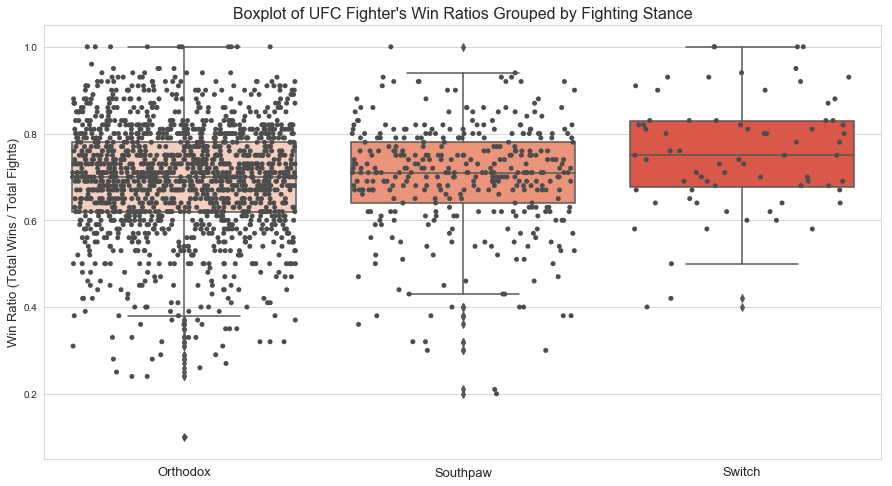

In [772]:
plt.figure(figsize=(15,8))
# sns.set_style("whitegrid")
sns.set_palette("Reds", 4)
sns.boxplot(x="stance",y="win_ratio",data=fighter_df,order=["Orthodox", "Southpaw", "Switch"])
sns.stripplot(x="stance", y="win_ratio", data=fighter_df, order=["Orthodox", "Southpaw", "Switch"], jitter=0.4, color="0.3")
plt.title("Boxplot of UFC Fighter's Win Ratios Grouped by Fighting Stance", fontsize=16)
plt.xlabel("")
plt.xticks([0,1,2],["Orthodox","Southpaw","Switch"],fontsize=13)
plt.ylabel("Win Ratio (Total Wins / Total Fights)", fontsize=13)

file_path = "/Users/ravimalde/dsc-files/student/Projects/web_scraping_blog/"
plt.savefig(file_path + "boxplot.png")

plt.show()

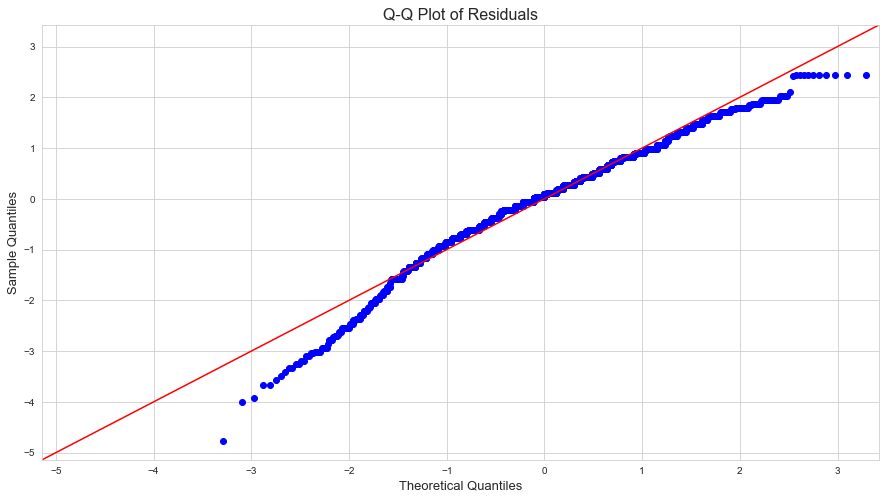

In [761]:
stance_model = ols("win_ratio ~ C(stance)", data=fighter_df).fit()
residuals = stance_model.resid

fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

ax = plt.gca()
fig.set_size_inches(15, 8)
ax.set_xlabel("Theoretical Quantiles", fontsize=13)
ax.set_ylabel("Sample Quantiles", fontsize=13)
ax.set_title("Q-Q Plot of Residuals", fontsize=16)

file_path = "/Users/ravimalde/dsc-files/student/Projects/web_scraping_blog/"
plt.savefig(file_path + "residuals.png")

plt.show()

In [762]:
homoscedasticity_test = stats.levene(orthodox_df.win_ratio, southpaw_df.win_ratio, switch_df.win_ratio)
homoscedasticity_test

# P-value is > 0.05, therefore the datasets are homoscedastic

LeveneResult(statistic=1.1027064465163936, pvalue=0.3321714495253307)

In [763]:
lm = ols('win_ratio ~ C(stance) ',data=fighter_df).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(stance),2.0,0.241238,0.120619,7.73281,0.000451
Residual,2017.0,31.461850,0.015598,NaN,NaN


In [764]:
p_adjusted = multipletests(0.000451, alpha= 0.05, method='bonferroni')
p_adjusted

(array([ True]), array([0.000451]), 0.050000000000000044, 0.05)

In [767]:
mc = MultiComparison(fighter_df['win_ratio'], fighter_df['stance'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1   group2  meandiff  lower  upper  reject
------------------------------------------------
Orthodox Southpaw  0.0021  -0.0148 0.0191 False 
Orthodox  Switch   0.0592   0.0239 0.0945  True 
Southpaw  Switch   0.057    0.0193 0.0948  True 
------------------------------------------------
['Orthodox' 'Southpaw' 'Switch']


In [572]:
orthodox_mean = orthodox_df["win_ratio"].mean()
southpaw_mean = southpaw_df["win_ratio"].mean()
switch_mean = switch_df["win_ratio"].mean()

orthodox_std = orthodox_df["win_ratio"].std()
southpaw_std = southpaw_df["win_ratio"].std()
switch_std = switch_df["win_ratio"].std()

In [770]:
cohens_d_southpaw_orthodox = (southpaw_mean - orthodox_mean)/(((southpaw_std**2 + orthodox_std**2)/2)**0.5)
cohens_d_southpaw_orthodox

0.01727861242293682

In [771]:
cohens_d_switch_orthodox = (switch_mean - orthodox_mean)/(((switch_std**2 + orthodox_std**2)/2)**0.5)
cohens_d_switch_orthodox

0.4638929330124235

In [769]:
cohens_d_southpaw_switch = (switch_mean - southpaw_mean)/(((switch_std**2 + southpaw_std**2)/2)**0.5)
cohens_d_southpaw_switch

0.4487997797100583

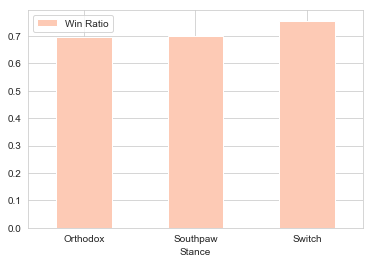

In [773]:
df = pd.DataFrame({'Stance':['Orthodox', 'Southpaw', 'Switch'], 'Win Ratio':[orthodox_mean, southpaw_mean, switch_mean]})
ax = df.plot.bar(x='Stance', y='Win Ratio', rot=0)

In [776]:
orthodox_southpaw_switch_dict = {'Orthodox':orthodox_mean, 'Southpaw':southpaw_mean, 'Switch':switch_mean}
print(orthodox_southpaw_switch_dict)

{'Orthodox': 0.6967911392405062, 'Southpaw': 0.6989402173913044, 'Switch': 0.7559722222222222}


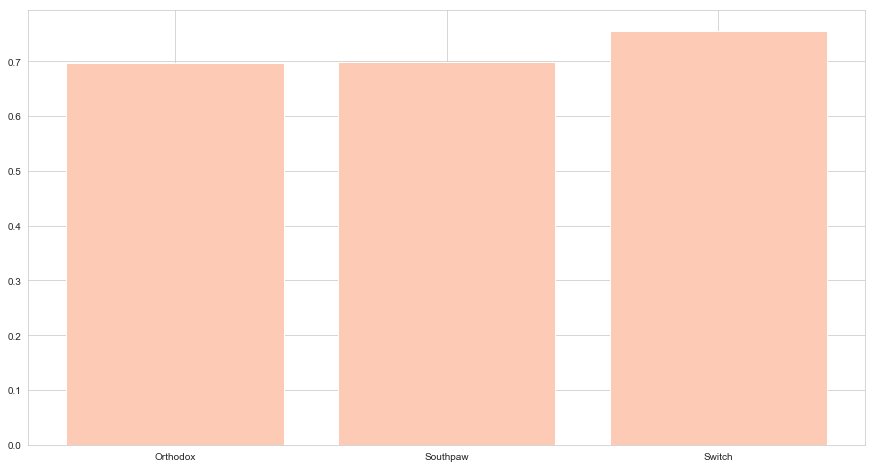

In [775]:
plt.figure(figsize=(15,8))
plt.bar(orthodox_switch_dict.keys(), orthodox_switch_dict.values(), align='center')
plt.show()